Category Embedding

In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Alienware\Documents\INGEGNERIA\Data Science PC\Python code\House price pred\houseprice.csv',
               usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()
df.shape

(1201, 10)

In [2]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [4]:
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [5]:
import datetime
datetime.datetime.now().year
df['Total Years']=datetime.datetime.now().year-df['YearBuilt']
df.drop("YearBuilt",axis=1,inplace=True)
df['Total Years'].head()

0     20
1     47
2     22
3    108
4     23
Name: Total Years, dtype: int64

In [6]:
cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature="SalePrice"

In [7]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,20
1,0,3,80.0,9600,1,3,1262,0,181500,47
2,5,3,68.0,11250,1,0,920,866,223500,22
3,6,3,60.0,9550,1,0,961,756,140000,108
4,5,3,84.0,14260,1,0,1145,1053,250000,23


In [8]:
### Stacking and Converting Into Tensors
import numpy as np
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [9]:
### Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [10]:
#### create continuous variable
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [11]:
### Stacking continuous variable to a tensor
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    20.],
        [   80.,  9600.,  1262.,     0.,    47.],
        [   68., 11250.,   920.,   866.,    22.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    82.],
        [   68.,  9717.,  1078.,     0.,    73.],
        [   75.,  9937.,  1256.,     0.,    58.]])

In [12]:
### Dependent Feature 
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1) #reshaping because needing a two dimensional variable
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [13]:
#### Embedding Size For Categorical columns
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]
cat_dims # input dimensions for the embedding layers

[15, 5, 2, 4]

In [14]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims] # rule of thumb to calculate output dimension for embedding layers
embedding_dim 

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [16]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [17]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i])) #generates the value of every embedding layer for each categorical feature
embedding_val

[tensor([[ 0.2267,  2.1640, -2.0608,  ...,  0.2775, -1.2261, -1.2427],
         [ 0.6365, -1.3017,  0.0686,  ...,  0.6798,  1.1686,  0.9410],
         [ 0.2267,  2.1640, -2.0608,  ...,  0.2775, -1.2261, -1.2427],
         ...,
         [-0.2908, -0.7661,  1.2330,  ..., -0.4948,  0.0761, -1.0239],
         [ 0.6365, -1.3017,  0.0686,  ...,  0.6798,  1.1686,  0.9410],
         [ 0.6365, -1.3017,  0.0686,  ...,  0.6798,  1.1686,  0.9410]],
        grad_fn=<EmbeddingBackward>),
 tensor([[-0.5141, -0.3220,  0.2182],
         [-0.5141, -0.3220,  0.2182],
         [-0.5141, -0.3220,  0.2182],
         ...,
         [-0.5141, -0.3220,  0.2182],
         [-0.5141, -0.3220,  0.2182],
         [-0.5141, -0.3220,  0.2182]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.8350],
         [-0.8350],
         [-0.8350],
         ...,
         [-0.8350],
         [-0.8350],
         [-0.8350]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.0669, -0.3843],
         [-1.0669, -0.3843],
         [-1.5961,  0.329

In [18]:
z = torch.cat(embedding_val, 1) #concatenation to obtain the right format (from 4 tensors for 4 categorical features, to 1 tensor)
z

tensor([[ 0.2267,  2.1640, -2.0608,  ..., -0.8350, -1.0669, -0.3843],
        [ 0.6365, -1.3017,  0.0686,  ..., -0.8350, -1.0669, -0.3843],
        [ 0.2267,  2.1640, -2.0608,  ..., -0.8350, -1.5961,  0.3296],
        ...,
        [-0.2908, -0.7661,  1.2330,  ..., -0.8350, -1.0669, -0.3843],
        [ 0.6365, -1.3017,  0.0686,  ..., -0.8350, -1.0669, -0.3843],
        [ 0.6365, -1.3017,  0.0686,  ..., -0.8350, -1.0669, -0.3843]],
       grad_fn=<CatBackward>)

In [19]:
#### Implement dropupout
droput=nn.Dropout(.4)
final_embed=droput(z)
final_embed

tensor([[ 0.3778,  3.6067, -0.0000,  ..., -1.3917, -1.7782, -0.6406],
        [ 0.0000, -0.0000,  0.1143,  ..., -0.0000, -1.7782, -0.0000],
        [ 0.3778,  0.0000, -0.0000,  ..., -1.3917, -2.6601,  0.5493],
        ...,
        [-0.4847, -1.2768,  0.0000,  ..., -1.3917, -0.0000, -0.6406],
        [ 0.0000, -2.1695,  0.0000,  ..., -1.3917, -1.7782, -0.6406],
        [ 1.0608, -2.1695,  0.1143,  ..., -1.3917, -1.7782, -0.0000]],
       grad_fn=<MulBackward0>)

In [20]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5): #out_sz: output (it's only one output: the house price)
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p) # p: dropout ratio
        self.bn_cont = nn.BatchNorm1d(n_cont) # n_cont: number of continuous features inputs
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim)) #n_emb: number of embedding layer output from categorical features
        n_in = n_emb + n_cont #n_in: total number of inputs 
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1) #concatenating conntinuous and categorical feature
        x = self.layers(x)
        return x

In [21]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [24]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [25]:
#train test split
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [26]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [27]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.78125
Epoch number: 11 and the loss : 200493.4375
Epoch number: 21 and the loss : 200489.15625
Epoch number: 31 and the loss : 200482.609375
Epoch number: 41 and the loss : 200473.265625
Epoch number: 51 and the loss : 200461.359375
Epoch number: 61 and the loss : 200446.390625
Epoch number: 71 and the loss : 200429.359375
Epoch number: 81 and the loss : 200408.0
Epoch number: 91 and the loss : 200383.421875
Epoch number: 101 and the loss : 200355.3125
Epoch number: 111 and the loss : 200322.125
Epoch number: 121 and the loss : 200291.40625
Epoch number: 131 and the loss : 200252.0
Epoch number: 141 and the loss : 200206.59375
Epoch number: 151 and the loss : 200162.265625
Epoch number: 161 and the loss : 200112.25
Epoch number: 171 and the loss : 200059.6875
Epoch number: 181 and the loss : 200005.734375
Epoch number: 191 and the loss : 199946.359375
Epoch number: 201 and the loss : 199881.453125
Epoch number: 211 and the loss : 199816.109375
Epoc

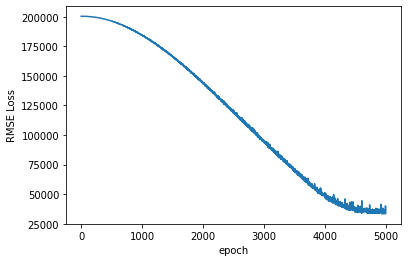

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [34]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))
y_pred[:5]

RMSE: 44063.47265625


tensor([[138206.2656],
        [185815.2969],
        [183497.3594],
        [219941.6719],
        [166235.8438]])

In [35]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,138206.265625,-8206.265625
1,138887.0,185815.296875,-46928.296875
2,175500.0,183497.359375,-7997.359375
3,195000.0,219941.671875,-24941.671875
4,142500.0,166235.843750,-23735.843750


In [37]:
#### Saving The Model
torch.save(model,'HousePrice.pt')
#### Save the weiights
torch.save(model.state_dict(),'HouseWeights.pt')


In [38]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [39]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [40]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)